In [1]:
import pandas as pd

In [2]:
pwd = pd.read_csv("pune_daily.csv",index_col="DATE")

In [3]:
pwd.head()

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2002-03-12,IN012190100,"POONA, IN",NaN,82,98.0,63.0
2002-03-13,IN012190100,"POONA, IN",NaN,81,95.0,67.0
2002-03-14,IN012190100,"POONA, IN",NaN,78,90.0,NaN
2002-03-15,IN012190100,"POONA, IN",NaN,77,92.0,60.0
2002-03-16,IN012190100,"POONA, IN",NaN,80,95.0,62.0


In [4]:
null_pct = pwd.apply(pd.isnull).sum()/pwd.shape[0]

In [5]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.587630
TAVG       0.000000
TMAX       0.328579
TMIN       0.159901
dtype: float64

In [6]:
pwd.columns = pwd.columns.str.lower()

In [7]:
pwd.head()

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
2002-03-12,IN012190100,"POONA, IN",NaN,82,98.0,63.0
2002-03-13,IN012190100,"POONA, IN",NaN,81,95.0,67.0
2002-03-14,IN012190100,"POONA, IN",NaN,78,90.0,NaN
2002-03-15,IN012190100,"POONA, IN",NaN,77,92.0,60.0
2002-03-16,IN012190100,"POONA, IN",NaN,80,95.0,62.0


In [8]:
pwd.shape

(7292, 6)

In [9]:
pwd = pwd.ffill()

In [10]:
pwd.apply(pd.isnull).sum()

station     0
name        0
prcp       16
tavg        0
tmax        0
tmin        0
dtype: int64

In [11]:
pwd = pwd.dropna()

In [12]:
pwd.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [13]:
pwd.shape

(7276, 6)

In [14]:
pwd.dtypes

station     object
name        object
prcp       float64
tavg         int64
tmax       float64
tmin       float64
dtype: object

In [15]:
pwd.index

Index(['2002-03-28', '2002-03-29', '2002-03-30', '2002-03-31', '2002-04-01',
       '2002-04-02', '2002-04-03', '2002-04-04', '2002-04-05', '2002-04-06',
       ...
       '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
       '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12'],
      dtype='object', name='DATE', length=7276)

In [16]:
pwd.index = pd.to_datetime(pwd.index)

In [17]:
pwd.index

DatetimeIndex(['2002-03-28', '2002-03-29', '2002-03-30', '2002-03-31',
               '2002-04-01', '2002-04-02', '2002-04-03', '2002-04-04',
               '2002-04-05', '2002-04-06',
               ...
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', name='DATE', length=7276, freq=None)

In [18]:
pwd.index.year.value_counts().sort_index()

2002    278
2003    365
2004    365
2005    365
2006    365
2007    362
2008    366
2009    364
2010    365
2011    360
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022     71
Name: DATE, dtype: int64

In [19]:
pwd.head()

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
2002-03-28,IN012190100,"POONA, IN",0.0,80,98.0,58.0
2002-03-29,IN012190100,"POONA, IN",0.0,81,99.0,60.0
2002-03-30,IN012190100,"POONA, IN",0.0,82,101.0,61.0
2002-03-31,IN012190100,"POONA, IN",0.0,83,102.0,63.0
2002-04-01,IN012190100,"POONA, IN",0.0,86,100.0,62.0


<AxesSubplot:xlabel='DATE'>

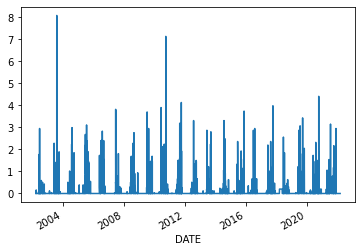

In [20]:
pwd["prcp"].plot()

In [21]:
pwd["target"] = pwd["tmax"].shift(-1)

In [22]:
pwd.head()

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
2002-03-28,IN012190100,"POONA, IN",0.0,80,98.0,58.0,99.0
2002-03-29,IN012190100,"POONA, IN",0.0,81,99.0,60.0,101.0
2002-03-30,IN012190100,"POONA, IN",0.0,82,101.0,61.0,102.0
2002-03-31,IN012190100,"POONA, IN",0.0,83,102.0,63.0,100.0
2002-04-01,IN012190100,"POONA, IN",0.0,86,100.0,62.0,96.0


In [23]:
pwd = pwd.ffill()

In [24]:
pwd

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
2002-03-28,IN012190100,"POONA, IN",0.0,80,98.0,58.0,99.0
2002-03-29,IN012190100,"POONA, IN",0.0,81,99.0,60.0,101.0
2002-03-30,IN012190100,"POONA, IN",0.0,82,101.0,61.0,102.0
2002-03-31,IN012190100,"POONA, IN",0.0,83,102.0,63.0,100.0
2002-04-01,IN012190100,"POONA, IN",0.0,86,100.0,62.0,96.0
...,...,...,...,...,...,...,...
2022-03-08,IN012190100,"POONA, IN",0.0,79,85.0,65.0,85.0
2022-03-09,IN012190100,"POONA, IN",0.0,78,85.0,65.0,85.0
2022-03-10,IN012190100,"POONA, IN",0.0,77,85.0,67.0,85.0


In [25]:
pwd.corr()

,prcp,tavg,tmax,tmin,target
prcp,1.000000,-0.026525,-0.187102,0.168801,-0.170857
tavg,-0.026525,1.000000,0.617243,0.696590,0.587064
tmax,-0.187102,0.617243,1.000000,0.097573,0.939185
tmin,0.168801,0.696590,0.097573,1.000000,0.078819
target,-0.170857,0.587064,0.939185,0.078819,1.000000


In [26]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [27]:
predictors = pwd.columns[~pwd.columns.isin(["target", "name", "station"])]

In [28]:
predictors

Index(['prcp', 'tavg', 'tmax', 'tmin'], dtype='object')

In [29]:
def backtest(pwd,model,predictors,start = 3650,step = 90):
    all_predictions = []         
    for i in range(start,pwd.shape[0],step):
        train = pwd.iloc[:i,:]
        test = pwd.iloc[i:(i+step),:]
        
        model.fit(train[predictors],train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds,index=test.index)
        
        combined = pd.concat([test["target"],preds],axis = 1)
        combined.columns = ["actual","prediction"]
        combined["diff"] = (combined["prediction"]-combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [30]:
predictions = backtest(pwd,rr,predictors)

In [31]:
predictions

,actual,prediction,diff
DATE,,,
2012-04-05,99.0,100.412715,1.412715
2012-04-06,102.0,99.251949,2.748051
2012-04-07,104.0,101.827419,2.172581
2012-04-08,102.0,103.846472,1.846472
2012-04-09,102.0,101.676851,0.323149
...,...,...,...
2022-03-08,85.0,85.586473,0.586473
2022-03-09,85.0,85.508774,0.508774
2022-03-10,85.0,85.338723,0.338723


In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"],predictions["prediction"])

0.977055892640889

In [33]:
predictions["diff"].mean()

0.9770558926408867

In [34]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
2015-02-28,66.0,84.122114,18.122114
2014-10-24,73.0,88.456847,15.456847
2018-06-26,85.0,99.177993,14.177993
2018-04-01,101.0,87.412887,13.587113
2015-03-01,81.0,68.385480,12.614520
...,...,...,...
2020-06-12,88.0,88.000679,0.000679
2019-09-21,88.0,88.000605,0.000605
2015-01-13,85.0,84.999572,0.000428


In [35]:
predictions["diff"].round().value_counts().sort_index()

0.0     1828
1.0     1086
2.0      362
3.0      167
4.0       82
5.0       45
6.0       23
7.0        9
8.0        9
9.0        6
10.0       2
11.0       2
13.0       1
14.0       2
15.0       1
18.0       1
Name: diff, dtype: int64

<AxesSubplot:>

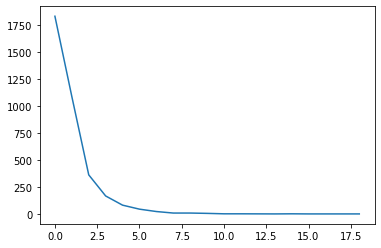

In [41]:
predictions["diff"].round().value_counts().sort_index().plot()